Reece Pretorius: V00880300 AND
Berkan Ozturk: V00892651

## Linear Regression from scratch

The goal of this exercise is to implement the linear regression algorithm. 
The dataset is about predicting salary given gpa and years of experience. 
The steps to implement are as follows.  

1.	Read the data from a file (gpa_year_experience.csv)
2.	Scale the attributes
3.	Compute the error at each iteration and save the error values in vector
4.	Plot the error vector as a curve in the end
5.	Predict a new instance.
6.  Compare with SGDRegressor
7.  Create polynomial features and predict new instance   

In [55]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

# ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [56]:
# load data and show first 5 rows
data = pd.read_csv('raw.githubusercontent.com_thomouvic_SENG474_main_data_gpa_years_experience.csv')
data.head()

,gpa,years_of_experience,salary
0,70,1.0,50
1,80,2.0,55
2,65,2.0,45
3,70,2.5,60
4,65,2.7,58


In [57]:
# prepare data, split columns into X and y
# X should be a numpy array of shape (m, n), use .values to convert from dataframe to numpy array
X = data[['years_of_experience', 'salary']].values
# y should be a numpy array of shape (m,), use .values to convert from dataframe to numpy array
y = data['gpa'].values

In [58]:
# extract m and n from X using X.shape[0] to get m and X.shape[1] to get n
m = X.shape[0]
n = X.shape[1]

In [59]:
# y should be a numpy array of shape (m, 1), use reshape(m, 1) to reshape y from (m,) to (m, 1)
y = y.reshape(m, 1)

In [60]:
# normalize X using min-max scaler (sklearn.preprocessing.MinMaxScaler)
scaler = MinMaxScaler()

# Normalize the input features (X)
X = scaler.fit_transform(X)

print("X:")
print(X)

X:
[[0.         0.11111111]
 [0.125      0.22222222]
 [0.125      0.        ]
 [0.1875     0.33333333]
 [0.2125     0.28888889]
 [0.25       0.33333333]
 [0.25       0.44444444]
 [0.275      0.48888889]
 [0.3125     0.22222222]
 [0.3375     0.33333333]
 [0.375      0.44444444]
 [0.4375     0.55555556]
 [0.5        0.73333333]
 [0.5625     0.66666667]
 [0.6        0.73333333]
 [0.625      0.55555556]
 [0.625      0.77777778]
 [0.6875     0.82222222]
 [0.75       0.66666667]
 [0.75       0.88888889]
 [0.8125     0.77777778]
 [0.875      0.82222222]
 [0.9375     0.88888889]
 [0.9625     1.        ]
 [1.         0.88888889]]


In [61]:
# add dummy feature to X using scikit-learn dummy feature (sklearn.preprocessing.add_dummy_feature)
from sklearn.preprocessing import add_dummy_feature

# Add a dummy feature to X
X = add_dummy_feature(X)

# Printing the X with dummy feature
print("X with dummy feature:")
print(X)

X with dummy feature:
[[1.         0.         0.11111111]
 [1.         0.125      0.22222222]
 [1.         0.125      0.        ]
 [1.         0.1875     0.33333333]
 [1.         0.2125     0.28888889]
 [1.         0.25       0.33333333]
 [1.         0.25       0.44444444]
 [1.         0.275      0.48888889]
 [1.         0.3125     0.22222222]
 [1.         0.3375     0.33333333]
 [1.         0.375      0.44444444]
 [1.         0.4375     0.55555556]
 [1.         0.5        0.73333333]
 [1.         0.5625     0.66666667]
 [1.         0.6        0.73333333]
 [1.         0.625      0.55555556]
 [1.         0.625      0.77777778]
 [1.         0.6875     0.82222222]
 [1.         0.75       0.66666667]
 [1.         0.75       0.88888889]
 [1.         0.8125     0.77777778]
 [1.         0.875      0.82222222]
 [1.         0.9375     0.88888889]
 [1.         0.9625     1.        ]
 [1.         1.         0.88888889]]


In [62]:
# print shapes of X and y
# X should be (m, n+1) and y should be (m, 1)
print("m: " + str(m) + " n: " + str(n))
print(X.shape, y.shape)

m: 25 n: 2
(25, 3) (25, 1)


[5749.589749931849]
Epoch: 1 Error: 2736.187031745364
Epoch: 2 Error: 1359.9854943545083
Epoch: 3 Error: 730.1947416446475
Epoch: 4 Error: 440.74479889615264
Epoch: 5 Error: 306.52547844858145
Epoch: 6 Error: 243.15116819640488
Epoch: 7 Error: 212.1516416235426
Epoch: 8 Error: 195.98730048929056
Epoch: 9 Error: 186.65987644008447
Epoch: 10 Error: 180.52061868894933


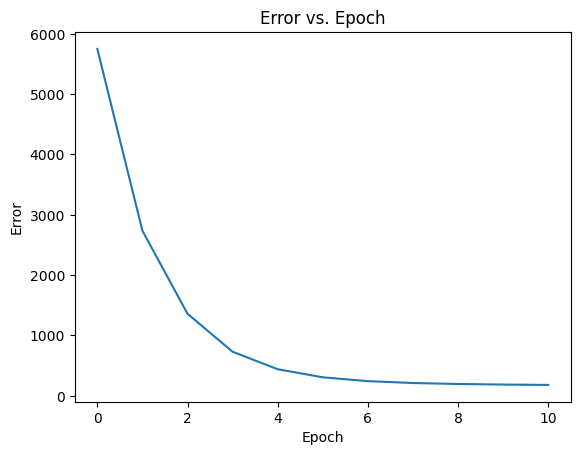

[[48.6184372 ]
 [20.16412857]
 [24.86062966]]


In [63]:
eta = 0.1 # learning rate
n_epochs = 10
np.random.seed(42) # set random seed to 42 for reproducibility

# create theta, of shape (n+1, 1) and initialize it to random values using np.random.randn
theta = np.random.randn(n + 1, 1)

E = [] # list to store errors at each epoch
# compute error for initial theta and append to E
y_pred = X.dot(theta)  # Compute predicted y using initial theta
error = np.mean((y_pred - y) ** 2)  # Compute mean squared error
E.append(error)

print(E)

# loop over n_epochs
# for each epoch: compute gradients, update theta, compute error, append error to E
for epoch in range(n_epochs):
    # Compute gradients
    gradients = 2 * X.T.dot(X.dot(theta) - y) / len(y)
    
    # Update theta
    theta -= eta * gradients
    
    # Compute error and append to E
    y_pred = X.dot(theta)
    error = np.mean((y_pred - y) ** 2)
    E.append(error)

    print("Epoch:", epoch + 1, "Error:", error)

# plot error vs epoch
import matplotlib.pyplot as plt

plt.plot(range(0, n_epochs + 1), E)
plt.xlabel('Epoch')
plt.ylabel('Error')
plt.title('Error vs. Epoch')
plt.show()

# print final theta
print(theta)

In [64]:
# let's predict the salary for a person who has gpa=70 and years_of_experience=3. 
# create a numpy array x of shape (1, 2) with these values
x = np.array([[70, 3]])
# scale features using the same scaler we used earlier
x = scaler.fit_transform(x)
# insert dummy feature using dummy feature function
x = add_dummy_feature(x)
# Predict salary of x
predicted_salary = x.dot(theta).round(1)

print("Predicted Salary:")
print(predicted_salary)

Predicted Salary:
[[48.6]]


In [65]:
# Let's compare with scikit-learn's SGDRegressor
# use SGDRegressor from scikit-learn to fit the data
# use max_iter=1000, eta0=0.1, random_state=42
from sklearn.linear_model import SGDRegressor

# Create an instance of SGDRegressor
regressor = SGDRegressor(max_iter=1000, eta0=0.1, random_state=42)

# Fit the data
regressor.fit(X, y)

# Print the coefficients
print("Coefficients:")
print(regressor.coef_)
print("Intercept:")
print(regressor.intercept_)

Coefficients:
[34.06352249  0.27230058 12.92480372]
Intercept:
[34.1372141]


In [67]:
# predict salary of x using sgd
predicted_salary = regressor.predict(x).round(1)
print("Predicted Salary:")
print(predicted_salary)

Predicted Salary:
[68.2]


In [70]:
# create polynomial features of degree 2 using scikit-learn PolynomialFeatures
from sklearn.preprocessing import PolynomialFeatures

# Create an instance of PolynomialFeatures
poly_features = PolynomialFeatures(degree=2)

# create X_poly using fit_transform
X_poly = poly_features.fit_transform(X)

# create x_poly using transform
x_poly = poly_features.transform(x)

# fit the data using SGDRegressor
regressor.fit(X_poly, y)

# predict salary of x using sgd
predicted_salary = regressor.predict(x_poly).round(1)

print("Predicted Salary:")
print(predicted_salary)

Predicted Salary:
[69.4]
